<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_06_keras_mlp_cnn_rnn_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP, CNN, and RNNs

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, SimpleRNN, LSTM, GRU

## Dense layer
- fully connected layer
- Now the model will take as input arrays of shape (None, 16)  and output arrays of shape (None, 32).  
- Note that after the first layer, you don't need to specify the size of the input anymore:

In [ ]:
# Dense layer
model = Sequential()

model.add(Input(shape=(16,)))
model.add(layers.Dense(32, activation='relu'))
# model.add(Dense(32, input_shape=(16,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()
model.output_shape

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

(None, 1)

In [ ]:
16*32 + 32, 32 * 32 + 32, 32*1 + 1

(544, 1056, 33)

In [ ]:
input = keras.Input(shape=(16, ))
x = layers.Dense(32, activation="relu")(input)
x = layers.Dense(32)(x)
output = layers.Dense(1)(x)

model = keras.Model(input, output)
#model.build(input_shape=(16,))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

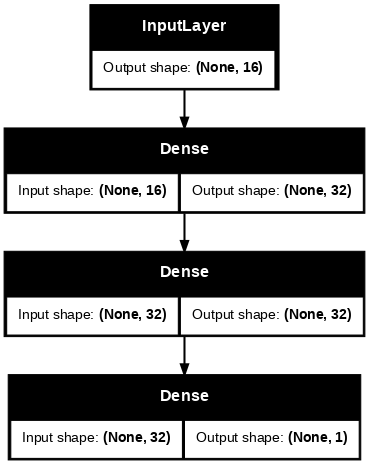

In [ ]:
keras.utils.plot_model(model, "model1.png", show_shapes=True, dpi=74)

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
'''
model.fit(X_train, y_train, batch_size=32)
model.evaluate(X_test, y_test)
model.predict(X_new)
'''

'\nmodel.fit(X_train, y_train, batch_size=32)\nmodel.evaluate(X_test, y_test)\nmodel.predict(X_new)\n'

## CNN layer
- When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis)

In [ ]:
model = tf.keras.models.Sequential()

model.add(Input(shape=(28,28,3)))
model.add(Conv2D(2, (3,3), activation='relu'))
model.summary()
model.output_shape

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 2)      │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

(None, 26, 26, 2)

In [ ]:
3*3*3 * 2 + 2

56

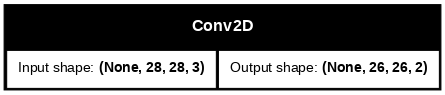

In [ ]:
keras.utils.plot_model(model, "model2.png", show_shapes=True, dpi=74)

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
x = Input(shape=x.shape[1:])   # (28,28,3)
y = Conv2D(2, (3,3), activation='relu')(x)
print(y.shape)


(None, 26, 26, 2)


In [ ]:
# With `dilation_rate` as 2. (3x3 필터 외곽 모형이 5x5 가 됨)
# it can deliver a wider field of view. -> popular in real-time segmentation.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = Conv2D(2, (3,3), activation='relu',
           dilation_rate=2, input_shape=input_shape[1:])(x)
print(y.shape)

(4, 24, 24, 2)


In [ ]:
# With `padding` as "same" (same) or "valid" (no padding)
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu',
                           padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 2)


## RNN layers
- SImpleRNN(units, return_sequences, return_state):
  - Fully-connected RNN where the output is to be fed back to input.
  - units: Positive integer, dimensionality of the output space
  - return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
  - return_state: Boolean. Whether to return the last state in addition to the output. Default: False
- inputs: A 3D tensor, with shape **[batch, timesteps, feature]** (RNN 셀에 입력되는 텐서의 모양은 (batch_size, timesteps, input_dim)
- output shape: (batch_size, units) or (batch_size, timesteps, units), if return_sequences=True.
- A RNN layer can return the entire sequence of outputs for each sample (one vector per timestep per sample), if return_sequences=True.
- LSTM
- GRU


- 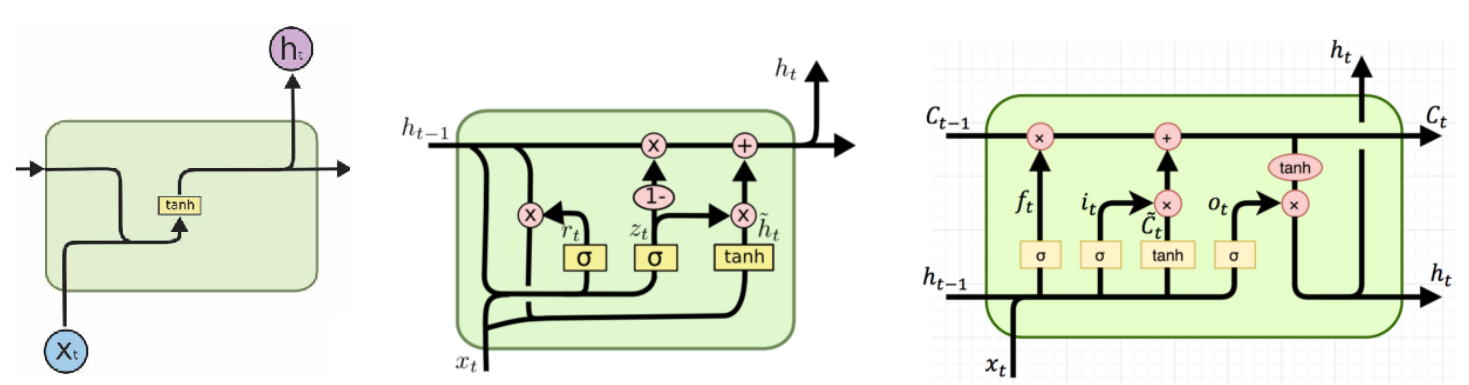

In [ ]:
# example 1

In [ ]:
# RNN 입력 데이터 예시
x = np.array([[[1, 2, 3],     # => timestep 1
               [4, 5, 6]],    # => timestep 2, # => batch 1

              [[7, 8, 9],
               [10, 11, 12]], # => batch 2

              [[13, 14, 15],
               [16, 17, 18]]  # => batch 3
             ])

print('(Batch size, timesteps, input_dim) = ',x.shape)

(Batch size, timesteps, input_dim) =  (3, 2, 3)


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50)(x)   # returns one
print(rnn.shape)
model = keras.Model(x, rnn)
model.summary()

(None, 50)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print((30 + 50) * 50 + 50)

4050


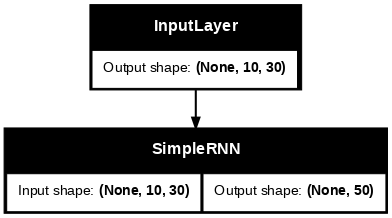

In [ ]:
keras.utils.plot_model(model, "model3.png", show_shapes=True, dpi=74)

In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True)(x)
print(rnn.shape)                # returns one
model = keras.Model(x, rnn)
model.summary()

(None, 10, 50)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 50)         │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True, return_state = True)(x)
print(len(rnn))                 # returns two (whole sequence output, final state)
print(rnn[0].shape, rnn[1].shape)
model = keras.Model(x, rnn)
model.summary()

2
(None, 10, 50) (None, 50)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ [(None, 10, 50),       │         4,050 │
│                                 │ (None, 50)]            │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

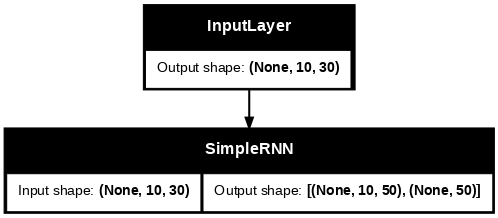

In [ ]:
keras.utils.plot_model(model, "model4.png", show_shapes=True, dpi=74)

In [ ]:
# when batch_size is given ( the same)
x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4)(x)
print(rnn.shape)  # The output has shape `[32, 4]`

x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4, return_sequences=True, return_state=True)(x)
whole_sequence_output, final_state = rnn[0], rnn[1]
print(whole_sequence_output.shape, final_state.shape)

(32, 4)
(32, 10, 4) (32, 4)


In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(10,30)))
model.add(layers.SimpleRNN(50))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)       │ (None, 50)             │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(10,30)))
model.add(layers.SimpleRNN(50, return_sequences=True))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_19 (SimpleRNN)       │ (None, 10, 50)         │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# sequential model
model = keras.Sequential()
model.add(Input(shape=(10,30)))
model.add(layers.SimpleRNN(50, return_sequences=True))
model.summary()

# functional API model
x = Input(shape=(10,30))
y = layers.SimpleRNN(50, return_sequences=True)(x)
model = Model(x,y)
model.summary()

x = Input(shape=(10,30))
y = layers.SimpleRNN(50, return_sequences=True, return_state=True)(x)
model = Model(x,y)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)       │ (None, 10, 50)         │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_21 (SimpleRNN)       │ (None, 10, 50)         │         4,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_22 (SimpleRNN)       │ [(None, 10, 50),       │         4,050 │
│                                 │ (None, 50)]            │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050 (15.82 KB)

 Trainable params: 4,050 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(10,30), return_sequences=True))
model.summary()  # (10,50)

# functional API model
x = Input(shape=(10,30))
y = layers.LSTM(50, return_sequences=True)(x)
model = Model(x,y)
model.summary()  # (10,50)

# return_state=True gives multiple output -> functional API needed
x = Input(shape=(10,30))
y = layers.LSTM(50, return_sequences=True, return_state=True)(x)
model = Model(x,y)
model.summary()   # (10,50), (50,)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        16,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,200 (63.28 KB)

 Trainable params: 16,200 (63.28 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        16,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,200 (63.28 KB)

 Trainable params: 16,200 (63.28 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 10, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ [(None, 10, 50),       │        16,200 │
│                                 │ (None, 50), (None,     │               │
│                                 │ 50)]                   │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,200 (63.28 KB)

 Trainable params: 16,200 (63.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
((30+50)*50 + 50) * 4

16200

In [ ]:
model = keras.Sequential()
model.add(layers.GRU(50, input_shape=(10,30), return_sequences=True))
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 50)         │        12,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,300 (48.05 KB)

 Trainable params: 12,300 (48.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
((30+50)*50 + 50) * 3   # != 12300

12150

## RNN with Embedding layer

- model.build():
  - 모델의 weight와 구조를 실제로 메모리에 생성.
  - Functional API나 Sequential 모델은 보통 model.fit() 호출 시 자동으로 build 된다.
  - 하지만 Subclassing API (class MyModel(tf.keras.Model): ...)를 사용할 때는, 모델을 정의한 후 model.build(input_shape)를 호출해야 내부 레이어들이 초기화된다.
  - 예: 모델을 정의했지만 아직 입력을 넣지 않은 상태에서 model.summary()를 보고 싶을 때 → model.build() 필요.

  - Sequential() 모델도 입력 shape를 모르면 summary에서 Output Shape를 못 보여줌.
  - 해결책: model.build(input_shape=(None, feature_dim)) 호출, 또는 첫 입력 데이터를 넣어 자동 build

In [ ]:
# example 2
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Input(shape=(10,)))
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))   # 128 internal units
model.add(layers.Dense(10))   # 10 units

# model.build(input_shape=(32, 10))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 10, 64)         │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,994 (351.54 KB)

 Trainable params: 89,994 (351.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
1000 * 64, (64 + 128) *128 + 128, 128*10 + 10

(64000, 24704, 1290)

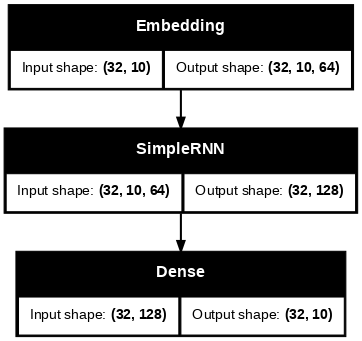

In [ ]:
keras.utils.plot_model(model, "model5.png", show_shapes=True, dpi=74)

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Input(shape=(100,), dtype='int32'))
model.add(layers.Embedding(input_dim=1000, output_dim=64))
# the same as
# model.add(layers.Embedding(input_dim=1000, output_dim=64, input_length=100))

model.add(layers.LSTM(128))   # 128 internal units
model.add(layers.Dense(10))
# model.build(input_shape=(None, 100))
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 64)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,106 (641.04 KB)

 Trainable params: 164,106 (641.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# (64 + 128) *128 + 128 = 24704
# 24704 * 4 = 98816

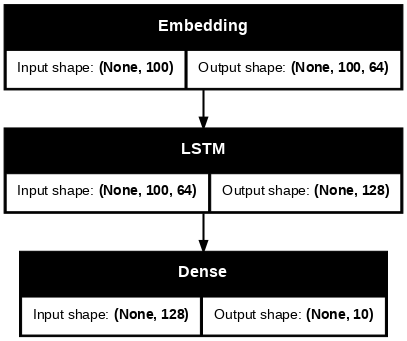

In [ ]:
keras.utils.plot_model(model, "model7.png", show_shapes=True, dpi=74)

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Input(shape=(100,), dtype='int32'))
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128, return_sequences=True))   # 128 internal units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 64)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100, 10)        │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,106 (641.04 KB)

 Trainable params: 164,106 (641.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# LSTM and Embedding layer with input_length
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64, input_length=100))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.build(input_shape=(None, 100))  # input layer 가 없으므로 필요함
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 100, 64)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       128,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,826 (1.11 MB)

 Trainable params: 290,826 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

- By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence.
- The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.
- A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. The shape of this output is (batch_size, timesteps, units).
- In addition, a RNN layer can return its final internal state(s) by giving return_state=True. The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(100,), dtype='int32'))
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.GRU(128, return_sequences=True))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 100, 64)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100, 128)       │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100, 10)        │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,786 (546.04 KB)

 Trainable params: 139,786 (546.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# GRU: 24704 * 3  이 아님 (weight 에 bias 주는 방법이 약간 다름)

# Functional API
- in case you have return_state=True (multi-output 이므로 functional API model 사용해야 함)

In [ ]:
# RNN
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

output1 = tf.keras.layers.SimpleRNN(4)(inputs)
print(output1.shape)

output2 = tf.keras.layers.SimpleRNN(4, return_sequences=True) (inputs)
print(output2.shape)

output3, state3 = tf.keras.layers.SimpleRNN(4, return_state=True)(inputs)
print(output3)
print(state3)

output3 == state3       # the same

(2, 4)
(2, 5, 4)
tf.Tensor(
[[-0.7010963   0.9806982   0.47247073 -0.9844662 ]
 [-0.36715534 -0.835845    0.9848599   0.27089608]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[-0.7010963   0.9806982   0.47247073 -0.9844662 ]
 [-0.36715534 -0.835845    0.9848599   0.27089608]], shape=(2, 4), dtype=float32)


<tf.Tensor: shape=(2, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

In [ ]:
output4 = tf.keras.layers.SimpleRNN(4, return_state=True, return_sequences=True)(inputs)
output4[0].shape, output4[1].shape

(TensorShape([2, 5, 4]), TensorShape([2, 4]))

In [ ]:
# LSTM
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

lstm = tf.keras.layers.LSTM(4)
output1 = lstm(inputs)
print(output1.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True)
output2 = lstm(inputs)
print(output2.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)   # outputs 3개
output3 = lstm(inputs)
print(output3[0].shape, output3[1].shape, output3[2].shape)

print("***")
[output3[i].numpy().round(2) for i in range(len(output3))]

(2, 4)
(2, 5, 4)
(2, 5, 4) (2, 4) (2, 4)
***


[array([[[-0.09,  0.29, -0.17,  0.19],
         [-0.1 ,  0.5 , -0.26,  0.4 ],
         [-0.1 ,  0.25, -0.06,  0.28],
         [ 0.13, -0.06, -0.32,  0.04],
         [ 0.12, -0.13, -0.26,  0.02]],
 
        [[-0.03,  0.14, -0.08,  0.09],
         [ 0.19,  0.03, -0.22,  0.02],
         [ 0.06, -0.03,  0.04, -0.  ],
         [-0.04, -0.07,  0.17, -0.03],
         [-0.21, -0.01,  0.28,  0.01]]], dtype=float32),
 array([[ 0.12, -0.13, -0.26,  0.02],
        [-0.21, -0.01,  0.28,  0.01]], dtype=float32),
 array([[ 0.25, -0.26, -0.6 ,  0.04],
        [-0.42, -0.02,  0.61,  0.03]], dtype=float32)]

In [ ]:
# GRU
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

gru = tf.keras.layers.GRU(4)
output1 = gru(inputs)
print(output1.shape)

gru = tf.keras.layers.GRU(4, return_sequences=True)
output2 = gru(inputs)
print(output2.shape)

gru = tf.keras.layers.GRU(4, return_state=True)
output3 = gru(inputs)
print(len(output3))
[output3[i].numpy().round(2) for i in range(len(output3))]

(2, 4)
(2, 5, 4)
3


[array([[-0.61,  0.51, -0.36,  0.42],
        [-0.08,  0.  , -0.11,  0.21]], dtype=float32),
 array([-0.61,  0.51, -0.36,  0.42], dtype=float32),
 array([-0.08,  0.  , -0.11,  0.21], dtype=float32)]

# Embedding Layer
- can only be used as the first layer in a model (right after the input layer)
- Turns positive integers (indexes) into dense vectors of fixed size:
  - (ex) [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

- Embedding(input_dim, output_dim, input_length):
  - input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  - output_dim: Integer. Dimension of the dense embedding.
  - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
- input_shape: (batch, input_length)
- output_shape: (batch, input_length. output_dim)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.
x = np.random.randint(1000, size=(32, 10))
output = model.predict(x)
model.summary()
print(output.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (32, 10, 64)           │        64,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,000 (250.00 KB)

 Trainable params: 64,000 (250.00 KB)

 Non-trainable params: 0 (0.00 B)

(32, 10, 64)


## Bidirectional RNNs
- For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.
- (ex) what word might be appropriate?
   - I am ___.
   - I am ___ hungry.
   - I am ___ hungry, and I can eat half a pig.
- Depending on the amount of information available, we might fill in the blanks with very different words such as “happy”, “not”, and “very”. Clearly the end of the phrase (if available) conveys significant information about which word to pick.
- need entire sentences to predict

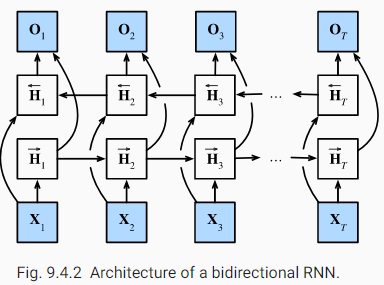

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ((10+64)*64 + 64) * 4 * 2   # bidirectional = two times of the single-directional

- Under the hood, Bidirectional will copy the RNN layer passed in, and flip the go_backwards field of the newly copied layer, so that it will process the inputs in reverse order.
- **The output of the Bidirectional RNN will be, by default, the sum of the forward layer output and the backward layer output**. If you need a different merging behavior, e.g. concatenation, change the merge_mode parameter in the Bidirectional wrapper constructor. For more details about Bidirectional, please check the API docs.

# (Exercise) LSTM on IMDB
- Bidirectional LSTM and single-direction LSTM

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
from tensorflow.keras.datasets import imdb

(x_train_org, y_train), (x_val_org, y_val) = imdb.load_data(num_words=max_features)
print(len(x_train_org), "Training sequences")
print(len(x_val_org), "Validation sequences")

# defualt: padding='pre', truncating='pre'
x_train = keras.preprocessing.sequence.pad_sequences(x_train_org, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val_org, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


In [ ]:
len(x_train_org[0]), len(x_train[0])

(218, 200)

In [ ]:
x_train.shape

(25000, 200)

In [ ]:
# bi-directional LSTM
inputs = keras.Input(shape=(maxlen,), dtype="int32")
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(50, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(50))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_46 (InputLayer)     │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_19 (Embedding)        │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 100)       │        71,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,101 (10.27 MB)

 Trainable params: 2,692,101 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.7298 - loss: 0.5141 - val_accuracy: 0.8489 - val_loss: 0.3410
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9126 - loss: 0.2277 - val_accuracy: 0.8668 - val_loss: 0.3246


In [ ]:
# single-directional LSTM model
model2 = Sequential()
model2.add(layers.Embedding(max_features, 128, input_length=maxlen))
model2.add(layers.LSTM(50, return_sequences=True))
model2.add(layers.LSTM(50))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.summary()

model2.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7601 - loss: 0.4721 - val_accuracy: 0.8615 - val_loss: 0.3236
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9295 - loss: 0.1940 - val_accuracy: 0.8687 - val_loss: 0.3397


## Imdb 데이터 읽기

- IMDB 데이터셋은 단어 인덱스를 만들 때 특수 토큰 3개를 앞에 예약해 둔다.
  - 0: <PAD> (패딩)
  - 1: <START> (리뷰 시작)
  - 2: <UNK> (unknown, 사전에 없는 단어)
  - 3: <UNUSED> (예비용)
  - 즉, 실제 단어 인덱스는 4부터 시작한다.

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '') for i in encoded_review])

print(x_train[0])
print(decode_review(x_train[0]))
print(x_train[1])
print(decode_review(x_train[1]))


[    5    25   100    43   838   112    50   670     2     9    35   480
   284     5   150     4   172   112   167     2   336   385    39     4
   172  4536  1111    17   546    38    13   447     4   192    50    16
     6   147  2025    19    14    22     4  1920  4613   469     4    22
    71    87    12    16    43   530    38    76    15    13  1247     4
    22    17   515    17    12    16   626    18 19193     5    62   386
    12     8   316     8   106     5     4  2223  5244    16   480    66
  3785    33     4   130    12    16    38   619     5    25   124    51
    36   135    48    25  1415    33     6    22    12   215    28    77
    52     5    14   407    16    82 10311     8     4   107   117  5952
    15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476   

# Exercise